In [10]:
from metrics import get_metrics_fuzzy, xie_beni
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
#%cd ..

In [11]:
%cd code

C:\Users\girob\Documents\MAI\IML\clusteringmethods\code


In [6]:
from scipy.io.arff import loadarff
import pandas as pd
df_sick, meta_train = loadarff(f'../datasets/sick.arff')

# Define datasets
df_sick = pd.DataFrame(df_sick)

# Decode utf8 columns
for col in df_sick.columns:
    df_sick[col].map(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

In [9]:
count = (df_sick["age"] > 90).sum()
print(count)

9


In [8]:
from main import load_ds

df_X, df_y = load_ds("vowel")

GS_FCM converged in 151 iterations.
{'Method': 'Fuzzy', 'ARI': 0.0020641498123216365, 'Purity': 0.13636363636363635, 'F-Measure': 0.15434083601286172, 'Davies-Bouldin Index': 1.4966063552174156, 'Silhouette Coefficient': 0.35214631217850056, 'Calinski': 147.64993517967238, 'Xie-Beni': 0.16698318787222025, 'Solving Time': None, 'Iterations': 151}


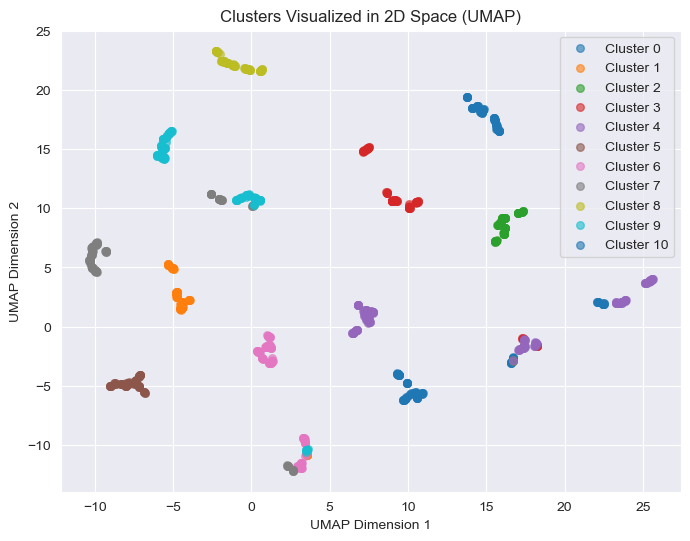

In [7]:
from fuzzyclustering import gs_fcm, get_cluster_list, defuzzyfy
from utils import plot_clusters, reduce_and_plot_with_umap
from metrics import get_metrics_fuzzy
import numpy as np
# Number of clusters
C = 11
m = 1.75
eta = 0.1

u, iters, centers = gs_fcm(df_X,C,m,suppress=True,generalized=True,eta=eta)
print(f"GS_FCM converged in {iters} iterations.")
clusters = defuzzyfy(u)
assignments = get_cluster_list(df_X,centers,clusters,C)
print(get_metrics_fuzzy(df_X,np.array(df_y),clusters,"Fuzzy",None,iters,u,centers,m))
#plot_clusters(assignments)
reduce_and_plot_with_umap(df_X,clusters)

In [20]:
from main import runAllFuzzyClustering

datasets = ["sick","grid","vowel"]
runAllFuzzyClustering(datasets)

In [12]:
import pandas as pd 

df = pd.read_csv('../output/fuzzyclustering_vowel.csv')

In [16]:
from utils import rank_and_sort

print(rank_and_sort(df,["ARI","Davies-Bouldin Index","Calinski","Silhouette Coefficient","Xie-Beni"]))

    Unnamed: 0                   Method       ARI    Purity  F-Measure  \
0            1   GS-FCM_k2_m1.05_eta0.5 -0.001827  0.090909   0.155340   
1            2   GS-FCM_k2_m1.05_eta0.9 -0.001827  0.090909   0.155340   
2            0   GS-FCM_k2_m1.05_eta0.1 -0.001827  0.090909   0.155340   
3          110  GS-FCM_k11_m1.05_eta0.9 -0.008629  0.090909   0.125000   
4          116  GS-FCM_k11_m1.75_eta0.9 -0.008629  0.090909   0.125000   
5          112   GS-FCM_k11_m1.5_eta0.5 -0.009069  0.090909   0.125000   
6          109  GS-FCM_k11_m1.05_eta0.5 -0.008223  0.090909   0.135593   
7          113   GS-FCM_k11_m1.5_eta0.9 -0.008223  0.090909   0.135593   
8           81      GS-FCM_k8_m2_eta0.1 -0.004011  0.090909   0.148148   
9           83      GS-FCM_k8_m2_eta0.9 -0.004460  0.090909   0.152174   
10         105     GS-FCM_k10_m2_eta0.1 -0.006050  0.090909   0.142857   
11         117     GS-FCM_k11_m2_eta0.1 -0.004011  0.090909   0.152174   

    Davies-Bouldin Index  Silhouette 

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

df = df.sort_values(by='Xie-Beni', ascending=True)
df[['Model', 'k', 'm', 'eta']] = df['Method'].str.split('_', expand=True)

# Further process to clean up the extracted columns
df['k'] = df['k'].str.extract('(\d+)', expand=False)  # Extract just the number for k
df['m'] = df['m'].str.extract('(\d+\.\d+|\d+)', expand=False)  # Extract number for m
df['eta'] = df['eta'].str.extract('(\d+\.\d+|\d+)', expand=False)  # Extract number for eta

# Combine the extracted components into a readable format
df['Formatted_Method'] = df['Model'] + ' (k=' + df['k'] + ', m=' + df['m'] + ', eta=' + df['eta'] + ')'

final_df = df[["k","m","eta","ARI","Calinski","Silhouette Coefficient","Xie-Beni","Solving Time"]].head(10)

print(final_df)

#latex_table = final_df.to_latex(index=False)
#print(latex_table)

      k     m  eta       ARI    Calinski  Silhouette Coefficient  Xie-Beni  \
114  11  1.75  0.1 -0.001944  152.725919                0.357996  0.165763   
118  11     2  0.5 -0.008629  176.358600                0.415239  0.177961   
106  10     2  0.5 -0.007494  165.225731                0.385252  0.211889   
94    9     2  0.5 -0.006573  151.521151                0.340728  0.239961   
82    8     2  0.5 -0.005586  146.200498                0.306201  0.284325   
111  11   1.5  0.1 -0.008629  175.443901                0.415037  0.285467   
102  10  1.75  0.1 -0.006488  158.074411                0.367195  0.293045   
103  10  1.75  0.5 -0.007494  162.315894                0.378130  0.340810   
115  11  1.75  0.5 -0.009069  177.117788                0.416520  0.344950   
70    7     2  0.5 -0.004798  138.551628                0.259339  0.354325   

     Solving Time  
114      1.092946  
118      0.287882  
106      0.155077  
94       0.132542  
82       0.078538  
111      0.410478  
1